In [13]:
#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [15]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [17]:
#!cd yolov5 & pip install -r requirements.txt


In [21]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [22]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/home/shawn/anaconda3/lib/python3.11/site-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/shawn/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-8-24 Python-3.11.9 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 5834MiB)

100%|██████████████████████████████████████| 14.1M/14.1M [00:04<00:00, 3.68MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers

In [25]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [33]:
img = 'https://hips.hearstapps.com/hmg-prod/images/10best-cars-group-cropped-1542126037.jpg'

In [35]:
results = model(img)
results.print()

/home/shawn/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 2139x3500 10 cars, 1 motorcycle
Speed: 346.0ms pre-process, 44.5ms inference, 91.3ms NMS per image at shape (1, 3, 416, 640)


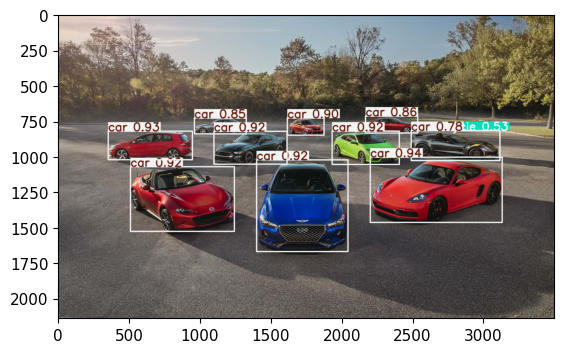

In [39]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()


In [41]:
results.render()

[array([[[226, 207, 193],
         [226, 207, 193],
         [226, 207, 193],
         ...,
         [118, 108,  72],
         [ 90,  80,  44],
         [ 86,  77,  38]],
 
        [[226, 207, 193],
         [226, 207, 193],
         [226, 207, 193],
         ...,
         [105,  95,  59],
         [ 84,  74,  38],
         [ 46,  37,   0]],
 
        [[227, 208, 194],
         [227, 208, 194],
         [227, 208, 194],
         ...,
         [ 50,  40,   4],
         [ 68,  58,  22],
         [ 95,  86,  47]],
 
        ...,
 
        [[140, 140, 138],
         [113, 113, 111],
         [ 82,  82,  80],
         ...,
         [ 51,  57,  45],
         [ 93, 101,  88],
         [124, 135, 121]],
 
        [[249, 249, 247],
         [243, 243, 241],
         [239, 239, 237],
         ...,
         [ 91,  97,  85],
         [ 91,  99,  86],
         [172, 183, 169]],
 
        [[238, 238, 238],
         [239, 239, 239],
         [244, 244, 244],
         ...,
         [184, 190, 178],
  

In [43]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

/home/shawn/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/shawn/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/shawn/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/shawn/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/home/shawn/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:869:

In [45]:
import uuid   # Unique identifier
import os
import time

In [47]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [49]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [51]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.77781c46-6278-11ef-a91e-f44637ca7ee8.jpg


In [53]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)  

data/images/awake.7b5e9b32-6278-11ef-a91e-f44637ca7ee8.jpg
data/images/awake.7b5e9c0e-6278-11ef-a91e-f44637ca7ee8.jpg
data/images/awake.7b5e9c7c-6278-11ef-a91e-f44637ca7ee8.jpg
data/images/awake.7b5e9ccc-6278-11ef-a91e-f44637ca7ee8.jpg
data/images/awake.7b5e9d26-6278-11ef-a91e-f44637ca7ee8.jpg
data/images/drowsy.7b5e9d8a-6278-11ef-a91e-f44637ca7ee8.jpg
data/images/drowsy.7b5e9dee-6278-11ef-a91e-f44637ca7ee8.jpg
data/images/drowsy.7b5e9e48-6278-11ef-a91e-f44637ca7ee8.jpg
data/images/drowsy.7b5e9ea2-6278-11ef-a91e-f44637ca7ee8.jpg
data/images/drowsy.7b5e9ef2-6278-11ef-a91e-f44637ca7ee8.jpg


In [55]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 5 (delta 0), pack-reused 2090 (from 1)
Receiving objects: 100% (2097/2097), 237.14 MiB | 13.23 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [59]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [61]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "/home/shawn/Documents/Github/machine_learning/yolov5/train.py", line 986, in <module>
    main(opt)
  File "/home/shawn/Documents/Github/machine_learning/yolov5/train.py", line 656, in main
    check_file(opt.data),